# Chapter 3: Unsupervised Learning and Customer Segmentation

From: https://www.amazon.com/Data-Science-Marketing-Analytics-practical/dp/1800560478 

Key concepts: 
-   Entities (customers, offers, etc)
-   Properties (age, income, etc)

Overall process:
1.  Chossing the relevant attributes for the entities
2.  Clustering/goruping the entities
3.  Understanding and describing the segments

#### Exercise 3.01: Mall customer segmentation - understanding the data

Get data from: https://packt.link/Dgl1z

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
# Import data
data0 = pd.read_csv("Mall_Customers.csv")
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Show dataframe information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Rename columns
data0.rename(
    {'Annual Income (k$)':'Income', 
     'Spending Score (1-100)':'Spend_score'}, 
     axis=1, 
     inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Get main stats
data0.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Approaches to segmentation:
-   Traditional:
    -   Rough groupings based on intuitions and arbitrary thresholds
    -   Unsupervised Learning (Clustering) for Customer Segmentation
        -   Choosing Relevant Attributes (Segmentation Criteria)
        -   Standardizing Data

### Exercise 3.02 (Rough groupings): Traditional Segmentation of Mall Customers

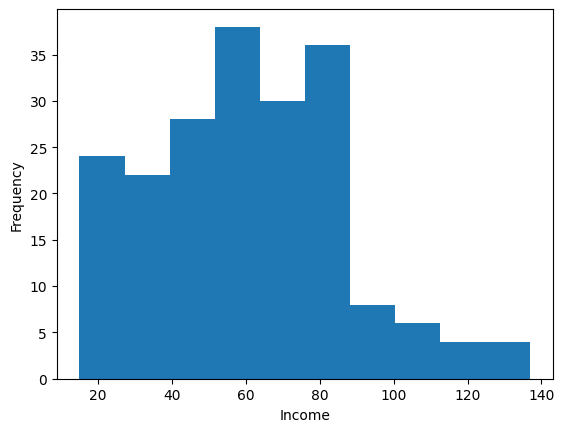

In [7]:
data0.Income.plot.hist()
plt.xlabel('Income')
plt.show()

In [8]:
# Create cluster variable
data0['Cluster'] = np.where(
    data0.Income >= 90, 'High earners', 
    np.where(data0.Income < 50, 
    'Low Income', 'Moderate Income'))

# Get stats over clusters
data0.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


### Exercise 3.03 (Unsupervised Learning): Standardizing Customer Data

In [9]:
# Import scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# Select columns to scale and copy dataframe
cols_to_scale = ['Age', 'Income', 'Spend_score']
data_scaled = data0.copy()

In [11]:
# Scale data
data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])

In [12]:
# Check main stats after scalling
data_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


### Exercise 3.04 (Unsupervised Learning): Calculating the Distance between Customers

In [13]:
# Select columns to get distance 
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [14]:
# Calculate distance between customers
from scipy.spatial.distance import cdist
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [15]:
# Check distance
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

np.float64(1.6305)

### Exercise 3.05 (Unsupervised Learning): K-Means Clustering on Mall Customers

In [16]:
# Select columns for clustering cols
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


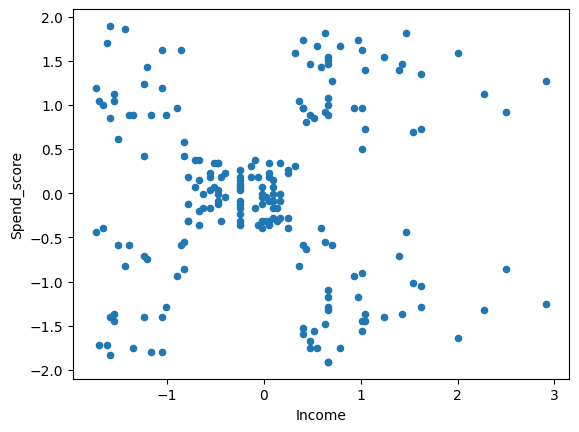

In [17]:
# Plot observations
data_scaled.plot.scatter(x='Income', y='Spend_score')
plt.show()

In [18]:
# Import KMeans from sklearn.cluster. Create an instance of the KMeans
# model specifying 5 clusters (n_clusters) and 42 for random_state
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

In [19]:
# Fit and predict
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,4
1,2,Male,-1.281035,-1.738999,1.195704,2
2,3,Female,-1.352802,-1.700830,-1.715913,4


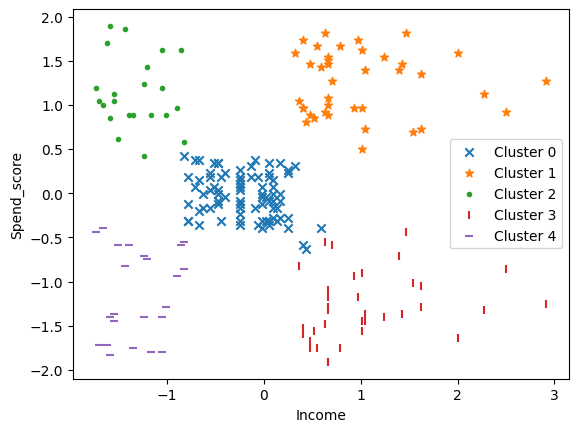

In [20]:
# Plot clusters
markers = ['x', '*', '.', '|', '_']
for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, 
                marker=markers[clust],
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

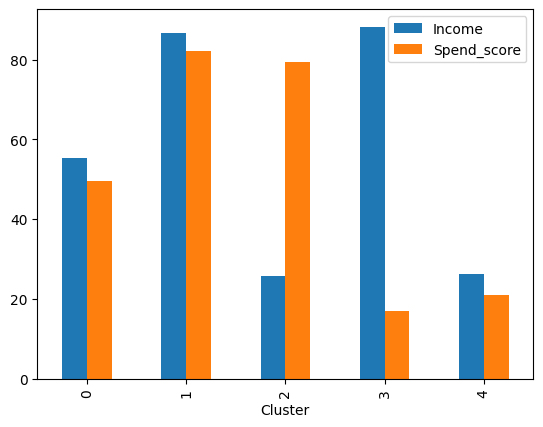

In [21]:
# Analyzing clusters 
data0['Cluster'] = data_scaled.Cluster
data0.groupby('Cluster')[['Income', 'Spend_score']].mean().plot.bar()
plt.show()

### Exercise 3.06 (Unsupervised Learning): Dealing with High-Dimensional Data

In [22]:
# Select Columns
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


In [23]:
# Setup, fit and predict with the model
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

In [24]:
# Using PCA create pc1 and pc2
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

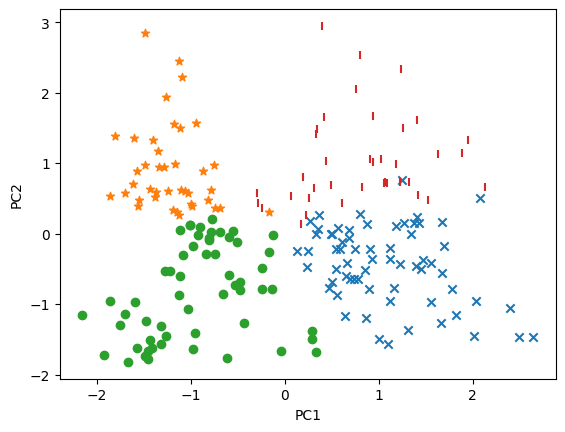

In [25]:
markers = ['x', '*', 'o','|']
for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust],
                label="Cluster "+str(clust))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [26]:
# Get variable means to understand the clusters
data0['Cluster'] = data_scaled.Cluster
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


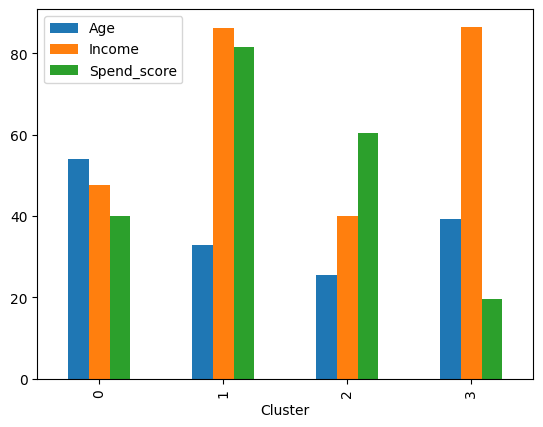

In [27]:
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean().plot.bar()
plt.show()

# Chapter 4: Evaluating and Choosing the Best Segmentation Approach

-   How do we choose the number of clusters?
    -   simple visual inspection
    -   elbow method with sum of squared errors
    -   silhouette score
-   How do we evaluate the clusters statistically/numerically?
-   Which is the best clustering algorithm for the task?

### Exercise 4.01: Data Staging and Visualization

In [29]:
# Import data
mall0 = pd.read_csv("Mall_Customers.csv")
mall0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
# Rename columns
mall0.rename(
    {'Annual Income (k$)':'Income', 
     'Spending Score (1-100)':'Spend_score'},
     axis=1, 
     inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


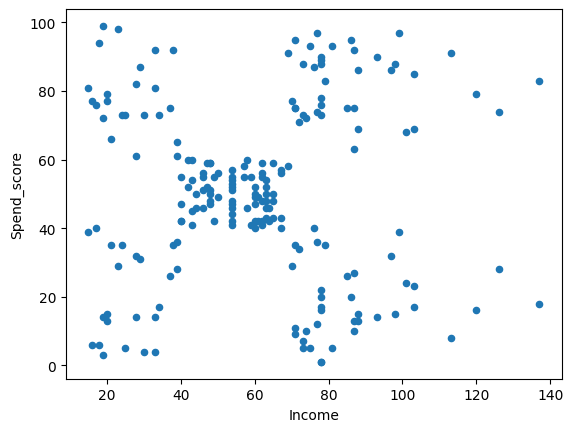

In [32]:
# Plot variables
mall0.plot.scatter(x='Income', y='Spend_score')
plt.show()

### Exercise 4.02: Choosing the Number of Clusters Based on Visual Inspection

In [33]:
# Standarize data 
mall_scaled = mall0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']
mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

In [34]:
# Define cluster cols
cluster_cols = ['Income', 'Spend_score']
markers = ['x', '*', '.', '|', '_', '1', '2']

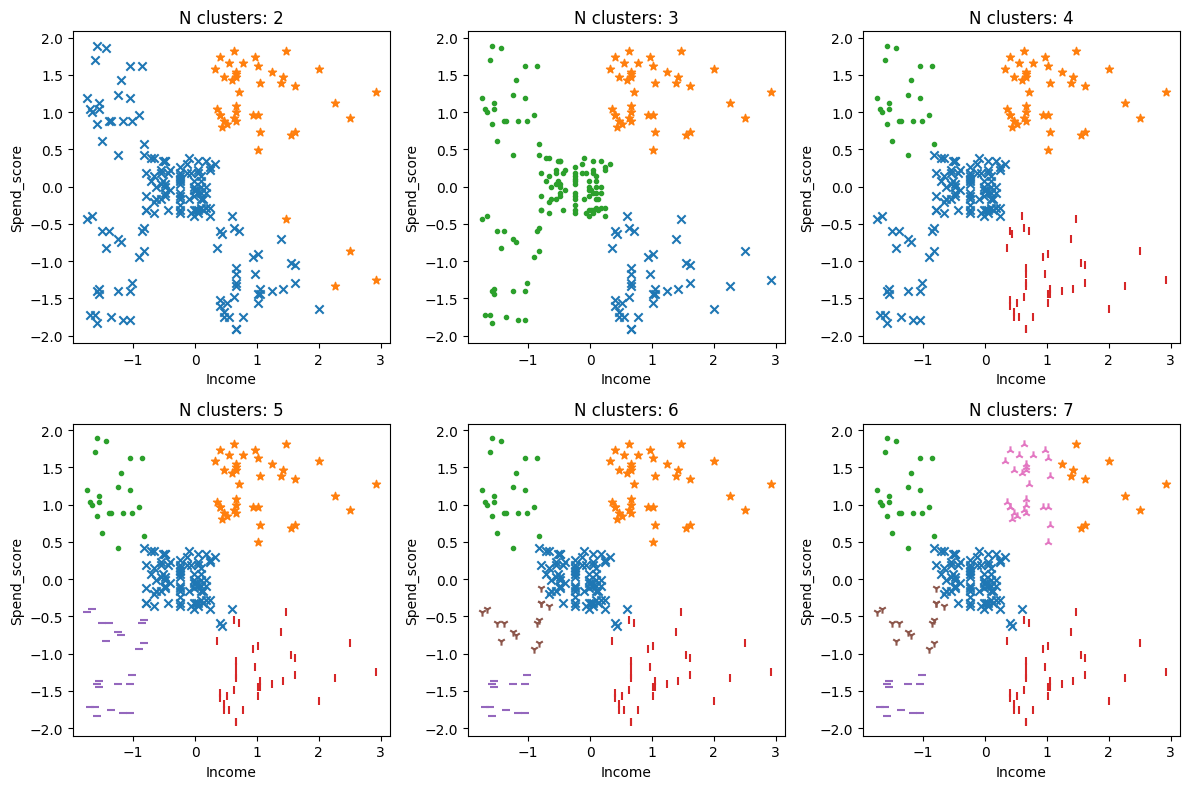

In [40]:
# Carry out a for loop to test different numbers of clusters
plt.figure(figsize=[12,8])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster']= model.fit_predict(mall_scaled[cluster_cols])
    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score,
                    marker=markers[clust],
                    label="Cluster "+str(clust))
        plt.title("N clusters: "+str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.tight_layout()
        #plt.legend()
plt.show()

### Exercise 4.03: Determining the Number of Clusters Using the Elbow Method

The sum of squared errors (SSE) is the sum of the "errors" (the difference between
a data point and the centroid of its assigned cluster) for all data points, squared. Another term for it is inertia.

In [42]:
# Try with 3 clusters and get the intertia
K = 3
model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

print(model.inertia_)

157.70400815035947


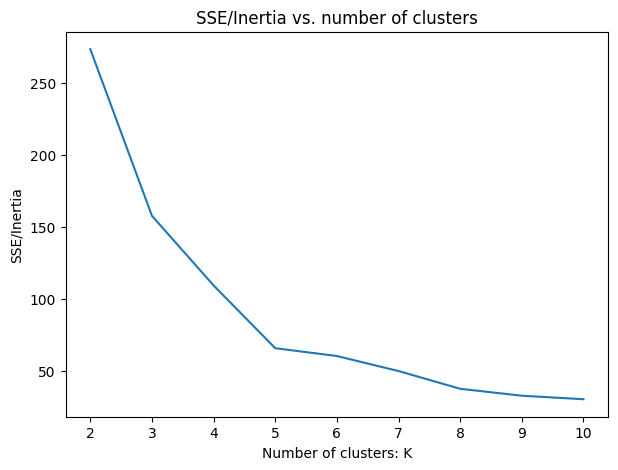

In [46]:
# Try with more values
X = mall_scaled[cluster_cols]
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)

plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores)
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

## More Clustering Techniques

-   **Mean-shift clustering** is an interesting algorithm in contrast to the k-means
algorithm because unlike k-means, it does not require you to specify the number of
clusters
-   **k-modes**: uses the mode of a cluster rather than the mean
-   **k-prototypes Clustering**: allows you to deal with cases where there is a mix of
categorical and continuous variables. Instead of defining a centroid for each cluster
like k-means or k-modes, k-prototypes clustering chooses a data point to be the
prototype and uses that as if it is the centroid of the cluster,

# Silhouette Score

The silhouette score is a general measure of how well a clustering fits
the data, so it can be used to not only compare two different models of different
types but also choose hyperparameters, such as the number of clusters or choice of
quantile for calculating bandwidth for mean-shift clustering.

A natural way to evaluate clusters is as follows: if the clusters are well-separated, then
any point in a cluster should be closer to most of the points in the same cluster than
to a point from another cluster.

### Exercise 4.06: Using Silhouette Score to Pick Optimal Number of Clusters

In [47]:
# Fit a clustering with 3 clusters
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

# Calculate the average silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

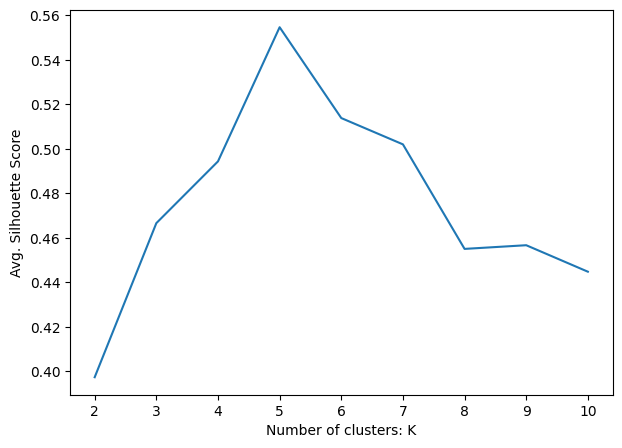

In [51]:
# Now try with more values 
silhouette_scores = []
for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores)
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

### Exercise 4.07: Using a Train-Test Split to Evaluate Clustering Performance

In [53]:
# Split the data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(mall0, train_size=0.75, random_state=42)

print(df_train.shape)
print(df_test.shape)

(150, 5)
(50, 5)


In [55]:
# Fit a 6-clusters model and print the sil. avg. score
model = KMeans(n_clusters=6, random_state=42)
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score(df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

0.48115779651498364


In [56]:
# Predict with the model onthe test set 
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score(df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

0.36676082422237655


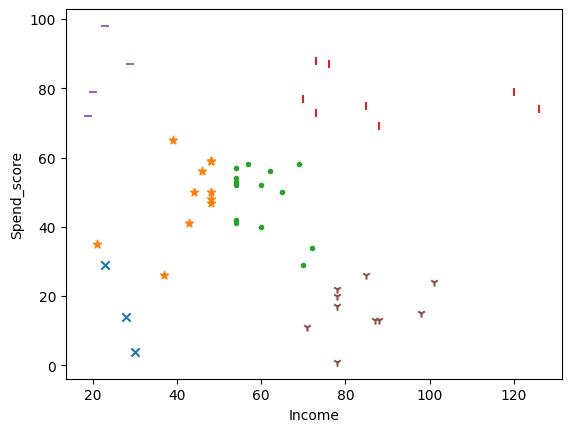

In [58]:
# Plot the data and the clusters to understand the drop fro, 0.48 to 0.36
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, 
                marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

In this exercise, you saw that if your clusters are not optimal and are fitting the train
data too well, the clusters don't generalize well on unseen data. The performance on
unseen data can very effectively be measured using the
train-test split approach.